In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("DKI Jakarta.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  314 non-null    datetime64[ns]
 1   Tn       299 non-null    float64       
 2   Tx       312 non-null    float64       
 3   Tavg     312 non-null    float64       
 4   RH_avg   312 non-null    float64       
 5   RR       243 non-null    float64       
 6   ss       310 non-null    float64       
 7   ff_x     313 non-null    float64       
 8   ddd_x    313 non-null    float64       
 9   ff_avg   313 non-null    float64       
 10  ddd_car  313 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 27.1+ KB


<ipython-input-2-9730db86a394>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.8,29.8,38.0,25.9
1,2023-02-01,23.4,30.0,134.4,27.2
2,2023-03-01,25.0,29.0,0.7,26.7
3,2023-04-01,24.6,30.6,3.2,27.0
4,2023-05-01,23.6,31.6,31.3,27.5
...,...,...,...,...,...
309,2023-10-28,27.0,33.6,NaN,30.3
310,2023-10-29,27.0,34.0,0.0,29.8
311,2023-10-30,27.0,33.8,0.0,30.7
312,2023-10-31,27.8,33.6,NaN,29.8


In [4]:
# cek duplikat
df1.duplicated().sum()

6

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates(keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.8,29.8,38.0,25.9
1,31,31,2023-01-02,26.4,29.8,0.4,27.5
2,60,61,2023-01-03,24.6,29.8,12.7,26.7
3,59,60,2023-01-03,25.0,29.4,11.0,26.7
4,91,92,2023-01-04,26.2,31.0,0.0,28.1
...,...,...,...,...,...,...,...
303,165,167,2023-12-06,26.2,33.8,0.0,30.1
304,195,198,2023-12-07,26.0,32.0,NaN,29.1
305,226,230,2023-12-08,25.8,33.6,NaN,28.8
306,257,262,2023-12-09,26.2,34.4,0.0,29.6


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn         15
Tx          2
RR         69
Tavg        2
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

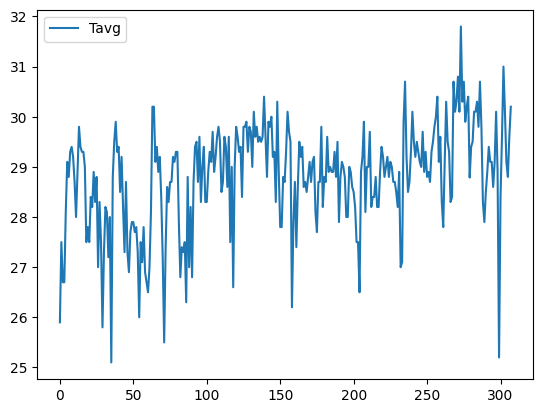

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

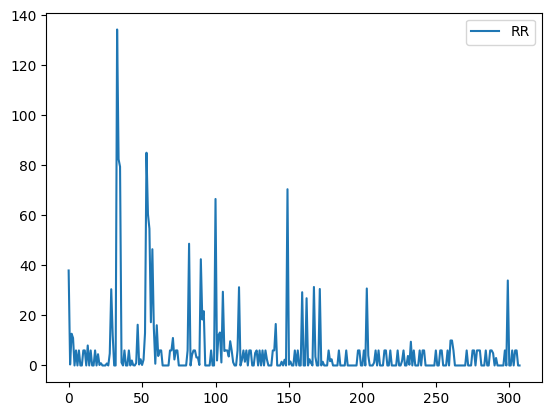

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#cek outllier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    print(row)

level_0                      1
index                        1
Tanggal    2023-02-01 00:00:00
Tn                        23.4
Tx                        30.0
RR                       134.4
Tavg                      27.2
Name: 33, dtype: object
level_0                     32
index                       33
Tanggal    2023-02-02 00:00:00
Tn                        24.4
Tx                        30.6
RR                        82.5
Tavg                      28.0
Name: 34, dtype: object
level_0                     53
index                       54
Tanggal    2023-02-23 00:00:00
Tn                        24.4
Tx                        30.2
RR                        85.1
Tavg                      27.3
Name: 53, dtype: object


In [14]:
#ganti outlier
for i, row in df1.iterrows():
  if row['RR'] > 80 :
    df1.at[i, 'RR'] = (df1.at[(i+1), 'RR'] + df1.at[(i-1), 'RR'])/2

<Axes: >

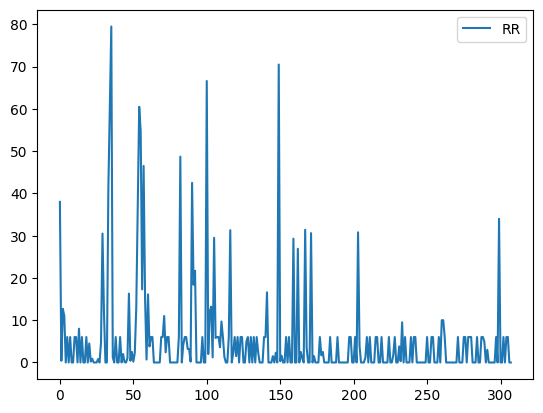

In [15]:
df1[['RR']].plot()

In [16]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.8,29.8,38.000000,25.9,29.8,27.5,0.400000
1,31,31,2023-01-02,26.4,29.8,0.400000,27.5,29.8,26.7,12.700000
2,60,61,2023-01-03,24.6,29.8,12.700000,26.7,29.4,26.7,11.000000
3,59,60,2023-01-03,25.0,29.4,11.000000,26.7,31.0,28.1,0.000000
4,91,92,2023-01-04,26.2,31.0,0.000000,28.1,31.4,29.1,6.020084
...,...,...,...,...,...,...,...,...,...,...
303,165,167,2023-12-06,26.2,33.8,0.000000,30.1,32.0,29.1,6.020084
304,195,198,2023-12-07,26.0,32.0,6.020084,29.1,33.6,28.8,6.020084
305,226,230,2023-12-08,25.8,33.6,6.020084,28.8,34.4,29.6,0.000000
306,257,262,2023-12-09,26.2,34.4,0.000000,29.6,35.2,30.2,0.000000


In [17]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.400000
1,0.400000,27.5,26.7,12.700000
2,12.700000,26.7,26.7,11.000000
3,11.000000,26.7,28.1,0.000000
4,0.000000,28.1,29.1,6.020084
...,...,...,...,...
303,0.000000,30.1,29.1,6.020084
304,6.020084,29.1,28.8,6.020084
305,6.020084,28.8,29.6,0.000000
306,0.000000,29.6,30.2,0.000000


In [18]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,38.000000,25.9,27.5,0.400000
1,0.400000,27.5,26.7,12.700000
2,12.700000,26.7,26.7,11.000000
3,11.000000,26.7,28.1,0.000000
4,0.000000,28.1,29.1,6.020084
...,...,...,...,...
302,6.020084,31.0,30.1,0.000000
303,0.000000,30.1,29.1,6.020084
304,6.020084,29.1,28.8,6.020084
305,6.020084,28.8,29.6,0.000000


In [19]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,38.000000,25.9,27.5,0.400000,0
1,0.400000,27.5,26.7,12.700000,1
2,12.700000,26.7,26.7,11.000000,2
3,11.000000,26.7,28.1,0.000000,3
4,0.000000,28.1,29.1,6.020084,4
...,...,...,...,...,...
302,6.020084,31.0,30.1,0.000000,302
303,0.000000,30.1,29.1,6.020084,303
304,6.020084,29.1,28.8,6.020084,304
305,6.020084,28.8,29.6,0.000000,305


In [21]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [22]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [23]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
X_test

,Indeks,Tavg
245,245,29.1
246,246,29.0
247,247,29.7
248,248,28.9
249,249,29.3
...,...,...
302,302,31.0
303,303,30.1
304,304,29.1
305,305,28.8


In [25]:
#testing
pred1 = lr.predict(X_test)
pred1

array([29.09118641, 29.04438859, 29.38658961, 28.99941782, 29.19574427,
       28.95444705, 29.00489894, 28.90947627, 29.20305243, 29.30212918,
       29.44983078, 29.54890752, 29.74523398, 29.11493793, 29.35988923,
       28.72959318, 28.48829595, 29.12224608, 29.70757136, 29.32039958,
       29.22497691, 28.74055542, 28.79100731, 29.91120597, 29.62128389,
       29.72036064, 29.96531195, 29.62676501, 30.45521456, 29.7276688 ,
       29.92399525, 29.53682347, 29.68452507, 29.78360181, 29.00157088,
       29.30100736, 29.35145925, 29.64503541, 29.64686245, 29.7459392 ,
       29.50464197, 29.94409269, 29.50829605, 28.78075029, 28.58807792,
       28.88165408, 29.07798053, 29.32293184, 29.17888432, 29.18071136,
       28.93941413, 29.18436544, 29.67244101, 29.09076981, 27.29347728,
       28.85129962, 29.4366249 , 30.11919988, 29.68340325, 29.19898175,
       29.05493423, 29.4457601 ])

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.6399165859113223 0.7853003029631679


In [27]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
245,245,29.1
246,246,29.0
247,247,29.7
248,248,28.9
249,249,29.3
...,...,...
302,302,31.0
303,303,30.1
304,304,29.1
305,305,28.8


In [28]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
245,29.091186
246,29.044389
247,29.386590
248,28.999418
249,29.195744
...,...
302,30.119200
303,29.683403
304,29.198982


In [29]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-29-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,25.9,NaN
1,27.5,NaN
2,26.7,NaN
3,26.7,NaN
4,28.1,NaN
...,...,...
302,31.0,30.119200
303,30.1,29.683403
304,29.1,29.198982
305,28.8,29.054934


<Axes: >

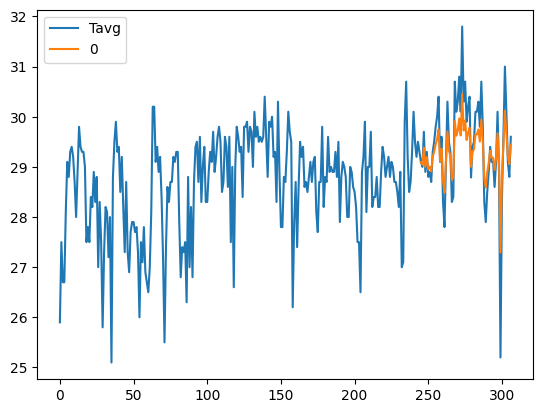

In [30]:
kan.plot()

In [31]:
new_data = [[350, 29.6],[351,29.6],[352,29.6],[353,29.6],[354,29.6],[355,29.6],[356,29.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([29.52614985, 29.52797689, 29.52980393, 29.53163097, 29.53345801,
       29.53528505, 29.53711209])

In [32]:
kan.to_json('prediksi_DKI Jakarta')